## Data exploration

In [2]:
# importing librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix

# Lecture des données
## Charger les données ou les lire directement en précisant le chemin
hsd=pd.read_csv("healthcare_synthetic_data.csv",sep=",",header=0)
# Vérification de la forme des données
hsd.head()




,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Family_History,Stress_Level,Sleep_Hours,Heart_Disease_Risk
0,PID-00001,60,0,146.9,51.3,23.8,140,89,217,151,52,83,0,1,3,0,1,8,0
1,PID-00002,53,0,161.8,76.6,29.3,128,81,203,119,38,116,0,0,1,0,7,9,0
2,PID-00003,62,1,174.7,92.4,30.3,141,100,173,124,45,90,0,0,0,0,1,7,1
3,PID-00004,73,1,173.3,68.9,22.9,136,96,193,117,45,81,0,0,1,0,2,7,1
4,PID-00005,52,1,178.6,79.8,25.0,122,80,236,153,41,79,0,1,2,0,2,6,0


In [3]:
hsd.dtypes

Patient_ID                  object
Age                          int64
Gender                       int64
Height_cm                  float64
Weight_kg                  float64
BMI                        float64
Systolic_BP                  int64
Diastolic_BP                 int64
Cholesterol_Total            int64
Cholesterol_LDL              int64
Cholesterol_HDL              int64
Fasting_Blood_Sugar          int64
Smoking_Status               int64
Alcohol_Consumption          int64
Physical_Activity_Level      int64
Family_History               int64
Stress_Level                 int64
Sleep_Hours                  int64
Heart_Disease_Risk           int64
dtype: object

List of quantitative variables
Gender
Smoking_Status
Alcohol_Consumption
Physical_Activity_Level 
Family_History
Stress_Level

In [4]:
qualitative_var = ["Gender", "Smoking_Status", "Alcohol_Consumption", "Physical_Activity_Level", "Family_History", "Stress_Level"]

for i in qualitative_var:
    hsd[i]=pd.Categorical(hsd[i])

"""
hsd["Patient_ID"]=pd.Categorical(hsd["Patient_ID"])
hsd["Gender"]=pd.Categorical(hsd["Gender"],ordered=False)
hsd["Smoking_Status"]=pd.Categorical(hsd["Gender"], ordered=False)
hsd["Alcohol_Consumption"]=pd.Categorical(hsd["Alcohol_Consumption"], ordered=False)
"""

'\nhsd["Patient_ID"]=pd.Categorical(hsd["Patient_ID"])\nhsd["Gender"]=pd.Categorical(hsd["Gender"],ordered=False)\nhsd["Smoking_Status"]=pd.Categorical(hsd["Gender"], ordered=False)\nhsd["Alcohol_Consumption"]=pd.Categorical(hsd["Alcohol_Consumption"], ordered=False)\n'

In [5]:
hsd.dtypes

Patient_ID                   object
Age                           int64
Gender                     category
Height_cm                   float64
Weight_kg                   float64
BMI                         float64
Systolic_BP                   int64
Diastolic_BP                  int64
Cholesterol_Total             int64
Cholesterol_LDL               int64
Cholesterol_HDL               int64
Fasting_Blood_Sugar           int64
Smoking_Status             category
Alcohol_Consumption        category
Physical_Activity_Level    category
Family_History             category
Stress_Level               category
Sleep_Hours                   int64
Heart_Disease_Risk            int64
dtype: object

In [6]:
hsd.describe()

,Age,Height_cm,Weight_kg,BMI,Systolic_BP,Diastolic_BP,Cholesterol_Total,Cholesterol_LDL,Cholesterol_HDL,Fasting_Blood_Sugar,Sleep_Hours,Heart_Disease_Risk
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,54.538133,165.336767,75.252573,27.446080,135.117667,90.541267,216.248000,140.355267,43.307867,99.670200,6.506067,0.436000
std,11.875294,9.186313,14.110559,4.134953,11.260634,8.443095,22.692222,17.914089,5.963153,15.261355,1.212626,0.495904
min,25.000000,138.500000,33.700000,14.500000,90.000000,60.000000,127.000000,70.000000,20.000000,60.000000,4.000000,0.000000
25%,46.000000,158.500000,65.200000,24.500000,127.000000,85.000000,201.000000,128.000000,39.000000,89.000000,6.000000,0.000000
50%,55.000000,164.700000,73.900000,27.200000,135.000000,91.000000,216.000000,140.000000,43.000000,99.000000,7.000000,0.000000
75%,63.000000,172.000000,83.900000,30.000000,143.000000,96.000000,231.000000,152.000000,47.000000,110.000000,7.000000,1.000000
max,85.000000,198.100000,150.100000,46.100000,182.000000,120.000000,303.000000,210.000000,68.000000,167.000000,10.000000,1.000000


### Exploration élémentaire

#### Statistiques unidimensionnelles

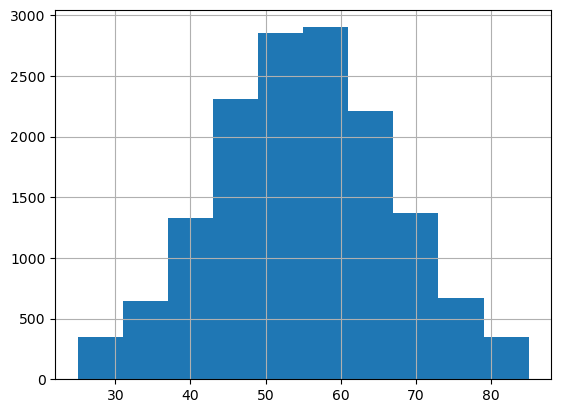

In [7]:
hsd["Age"].hist()
plt.show()

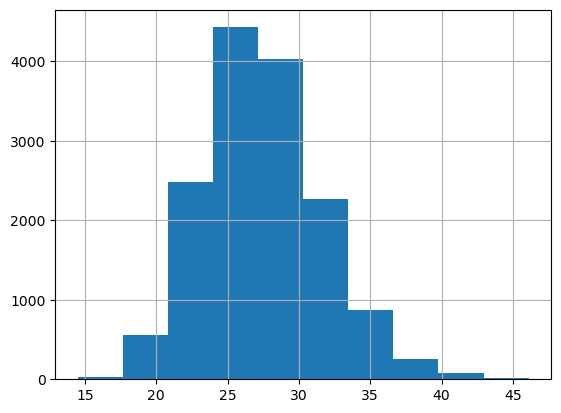

In [8]:
hsd["BMI"].hist()
plt.show()

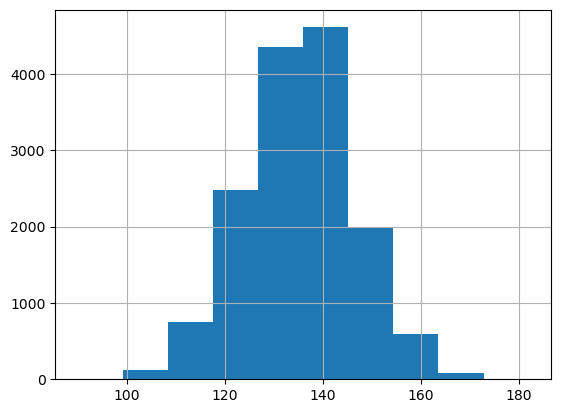

In [9]:
hsd["Systolic_BP"].hist()
plt.show()

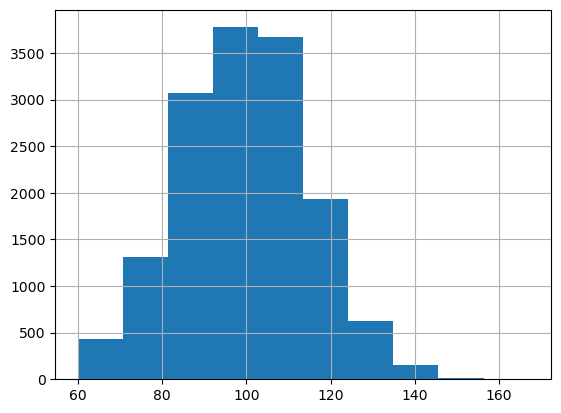

In [10]:
hsd["Fasting_Blood_Sugar"].hist()
plt.show()

In [ ]:
hsd["LBMI"]=hsd["BMI"].map(lambda x: log(x))
ozone[""]=ozone["NO2"].map(lambda x: log(x))
ozone["LNO"]=ozone["NO"].map(lambda x: log(x))
del ozone["RMH2O"]
del ozone["NO2"]
del ozone["NO"]